In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 16.0 MB/s eta 0:00:00


In [2]:


import kagglehub
import os

# 下载数据集
path = kagglehub.dataset_download("haoshengsong/yolov11-sarship")
print("Path to dataset files:", path)



100%|██████████| 634M/634M [00:05<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/haoshengsong/yolov11-sarship/versions/1


In [3]:
data_dir = f"{path}/yolov11-det/data/HRSID"

yaml_content = f"""
path: {data_dir}
train: images/train
val: images/test
nc: 1
names: ['ship']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml内容：")
!cat data.yaml


data.yaml内容：

path: /root/.cache/kagglehub/datasets/haoshengsong/yolov11-sarship/versions/1/yolov11-det/data/HRSID
train: images/train
val: images/test
nc: 1
names: ['ship']


In [4]:
!yolo train data=data.yaml model=yolov8n.pt epochs=10 imgsz=640


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 67.8MB/s]
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybri

In [6]:
!ls runs/detect/train/weights


best.pt  last.pt


随机抽取的测试集图片： ['/root/.cache/kagglehub/datasets/haoshengsong/yolov11-sarship/versions/1/yolov11-det/data/HRSID/images/test/P0075_1800_2600_3600_4400.jpg', '/root/.cache/kagglehub/datasets/haoshengsong/yolov11-sarship/versions/1/yolov11-det/data/HRSID/images/test/P0126_1800_2600_7200_8000.jpg', '/root/.cache/kagglehub/datasets/haoshengsong/yolov11-sarship/versions/1/yolov11-det/data/HRSID/images/test/P0044_1800_2600_5400_6200.jpg']
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/3 /content/temp_test_images/P0044_1800_2600_5400_6200.jpg: 640x640 1 ship, 7.4ms
image 2/3 /content/temp_test_images/P0075_1800_2600_3600_4400.jpg: 640x640 2 ships, 7.5ms
image 3/3 /content/temp_test_images/P0126_1800_2600_7200_8000.jpg: 640x640 2 ships, 7.1ms
Speed: 4.8ms preprocess, 7.3ms inference, 177.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/d

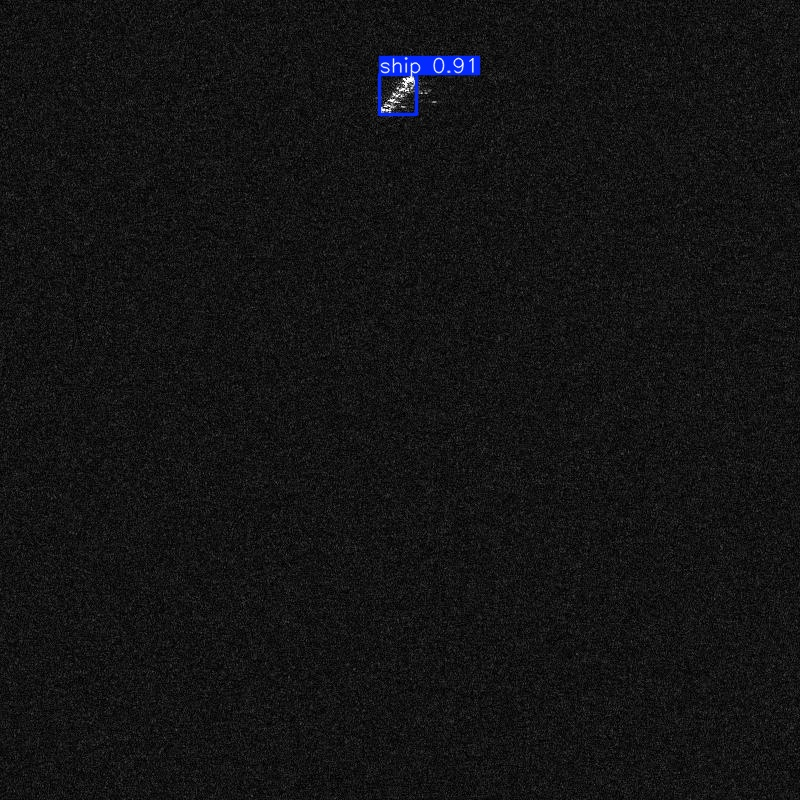

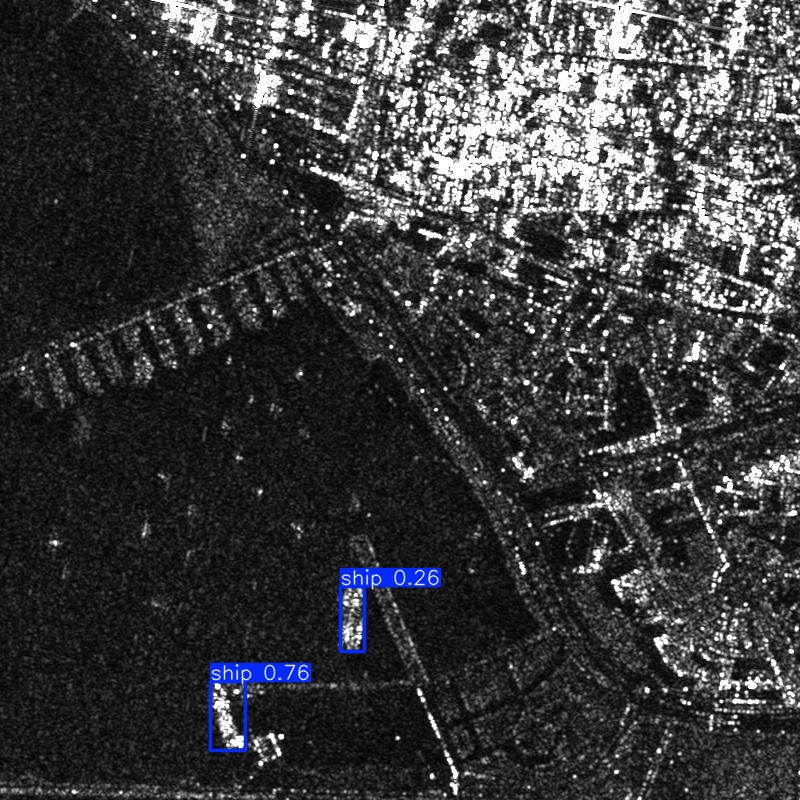

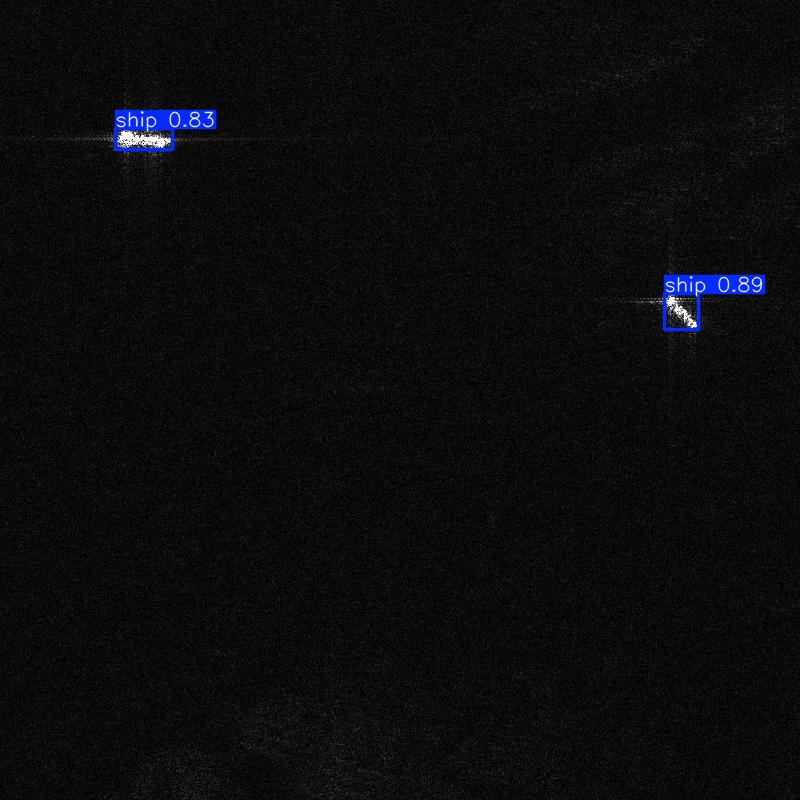

In [7]:
import glob
import random
import os
import shutil
from IPython.display import Image, display

#paths
test_img_dir = f"{path}/yolov11-det/data/HRSID/images/test"
model_path = "runs/detect/train/weights/best.pt"
output_dir = "runs/detect/predict"

# get images from test set
test_images = glob.glob(os.path.join(test_img_dir, "*.jpg"))

# check there are photos
if len(test_images) == 0:
    raise ValueError("测试集中没有找到图片，请检查路径或数据集。")

# ramdom drag
num_samples = 3
sample_images = random.sample(test_images, num_samples)
print("随机抽取的测试集图片：", sample_images)


temp_dir = "temp_test_images"
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)
os.makedirs(temp_dir, exist_ok=True)


for img_path in sample_images:
    shutil.copy(img_path, temp_dir)

# predict
!yolo detect predict model={model_path} source={temp_dir} save=true

# show
predicted_images = glob.glob(os.path.join(output_dir, "*.jpg"))
if len(predicted_images) == 0:
    print("预测未生成结果，请检查模型和命令。")
else:
    for img_path in predicted_images:
        display(Image(img_path))


In [23]:

!ls {path}/yolov11-det/data/HRSID

yolov11-det
images	labels


In [24]:
!ls {path}/yolov11-det/data/HRSID/images

test  train


In [26]:
!ls {path}/yolov11-det/data/HRSID/labels

test  test.cache  train  train.cache


In [29]:
!ls {path}/yolov11-det/data_yaml/HRSID.yaml

/root/.cache/kagglehub/datasets/haoshengsong/yolov11-sarship/versions/1/yolov11-det/data_yaml/HRSID.yaml
